In [1]:
#pip install matplotlib numpy pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
FILEPATH="./jeu_de_donnée/jeu_data1.csv"
HORIZON=np.random.randint(1,100)
FEATURE="Sales_quantity"
SEP=","
TITLE="vente des produit par region"

In [7]:
df=pd.read_csv(FILEPATH,sep=SEP)

In [8]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [9]:
all_alpha=[0.001,0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]

Text(0.5, 1.0, 'vente des produit par region')

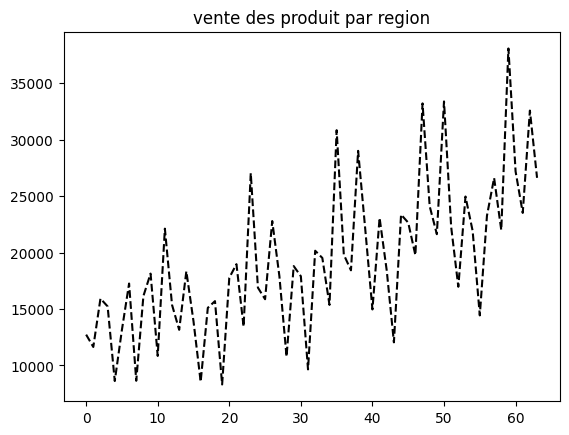

In [10]:
plt.plot(df[FEATURE], c="black", ls='--')
plt.title(TITLE)

In [11]:
def predict_simple_expo_lissage(data, alpha, taille, horizon=1):
    results=[]
    for i in range(taille-horizon):
        if i==0:
            results.append((1-alpha)*data[i])
        else:
            tmp=(1-alpha)*data[i]+alpha*results[i-1]
            results.append(tmp)
    return results

In [12]:
alpha=all_alpha[-1]
res=predict_simple_expo_lissage(df[FEATURE], alpha, len(df[FEATURE]))

In [13]:
all_results={}
for alpha in all_alpha:
    all_results[f"alpha_{alpha}"]=predict_simple_expo_lissage(df[FEATURE], alpha, len(df[FEATURE]), HORIZON)

In [14]:
def sum_square_error(real, predic):
    result=real-predic
    result=result**2
    return np.sum(result)

In [15]:
all_error={}
for key in all_results.keys():
    real=np.array(df[FEATURE])
    predic=np.array(all_results[key])
    all_error[key]=sum_square_error(real[:real.shape[0]-HORIZON],predic)

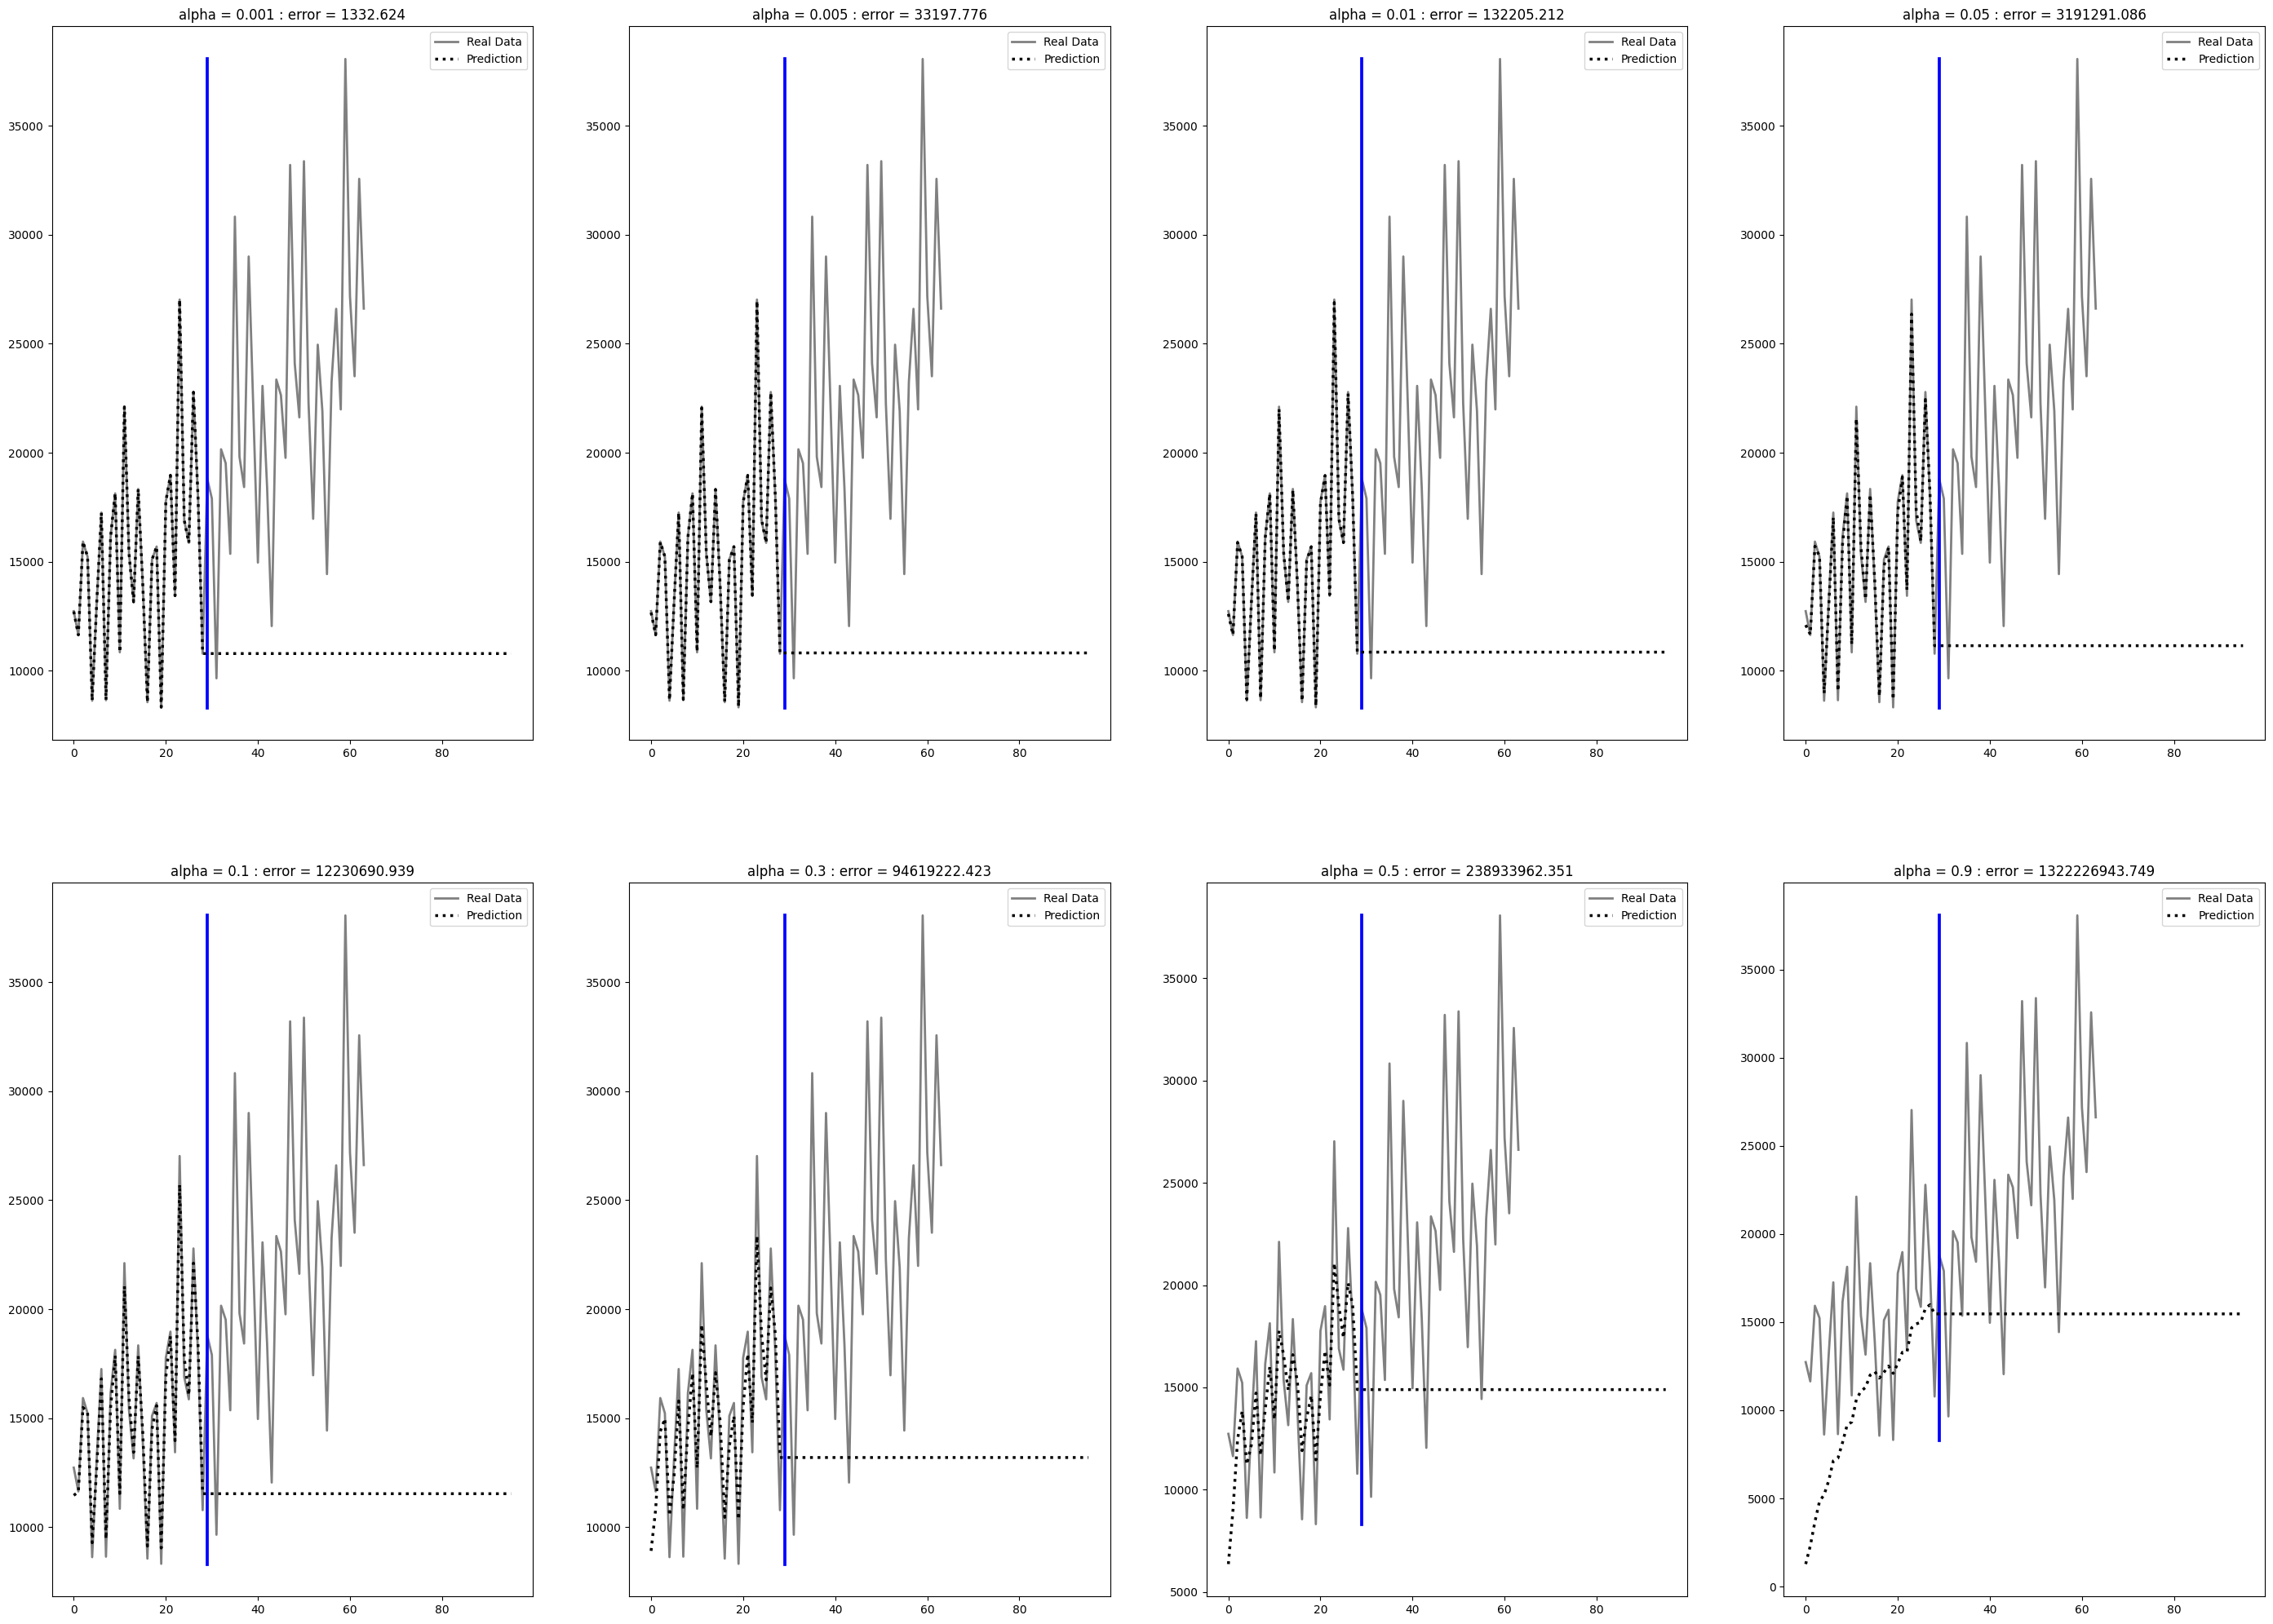

In [16]:
plt.figure(figsize=[35, 25])
for i in range(len(all_alpha)):
    plt.subplot(2, 4, i+1)
    plt.plot(df[FEATURE] , label='Real Data', c='gray', lw=2)
    m1=np.max(df[FEATURE])+10
    m2=np.min(df[FEATURE])-10
    x=len(df)-HORIZON
    y=np.linspace(m2,m1,100)
    x=np.ones(y.shape)*x
    plt.plot(x,y, c="blue", lw=2.7, ls="-")
    last=all_results[f"alpha_{all_alpha[i]}"][-1]
    tmp=all_results[f"alpha_{all_alpha[i]}"]
    for j in range(HORIZON):
        tmp.append(last)
    plt.plot(tmp, label='Prediction', lw=2.5 , ls=':', c='black')
    alpha=f"alpha_{all_alpha[i]}"
    plt.title(f"alpha = {all_alpha[i]} : error = {all_error[alpha]:.3f}")
    plt.legend()